In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

## 1. Reading the data 

We would be first reading the data that is present in the kaggle repository to ensure that we work with it. 

In [2]:
df = pd.read_csv('train.csv')

Reading the head of the dataframe, we see that there are different columns such as textID, text, selected_text and the output that we are going to be predict which is sentiment respectively. 

In [3]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


We would be dropping the selected text as the test set does not contain those values. It would be good to leave only the text for the machine learning models for predictions respectively. 

In [4]:
df.drop(['selected_text'], axis = 1, inplace = True)

Since we have removed the selected text, we are only left with the actual text values along with the sentiment whether it is positive, negative or neutral output respectively.

In [5]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


## 2. Distribution of the Sentiment 


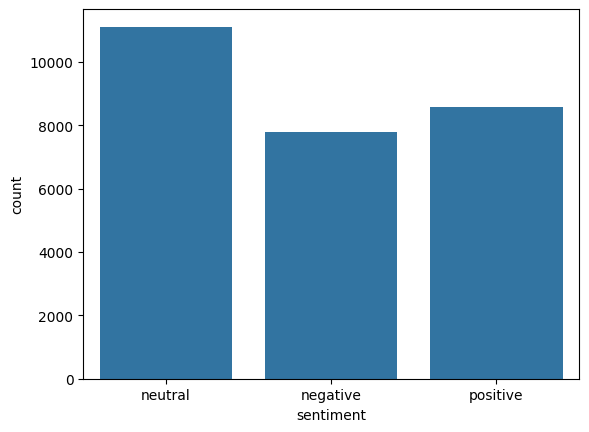

In [6]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [7]:
df.shape

(27481, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [9]:
df.dropna(inplace = True)

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [11]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [12]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [13]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [14]:
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [15]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [16]:
wordcloud = WordCloud(width = 500, height = 500)

In [17]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [18]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [19]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [20]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

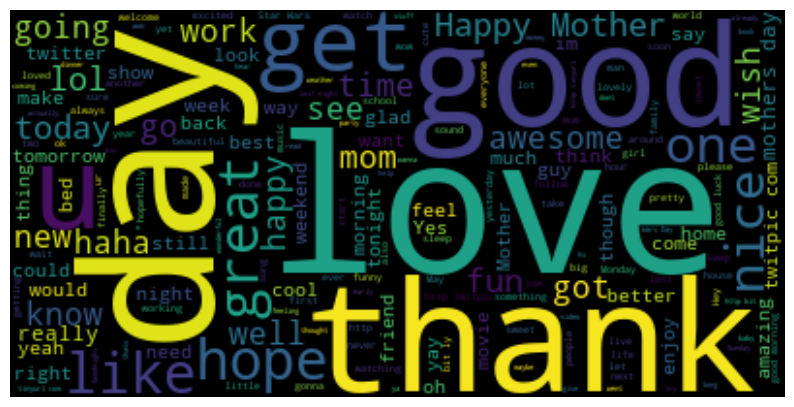

In [22]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Convert stopwords to a set of lowercased words
stopwords_set = set(stopwords.words('english'))

# Assuming 'positive_text' is a list of strings
wordcloud = WordCloud(stopwords=stopwords_set)

# Join all positive text into a single string for wordcloud generation
wordcloud.generate(''.join(positive_text))

# Display the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [24]:
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

## 4. Negative Text WordCloud 


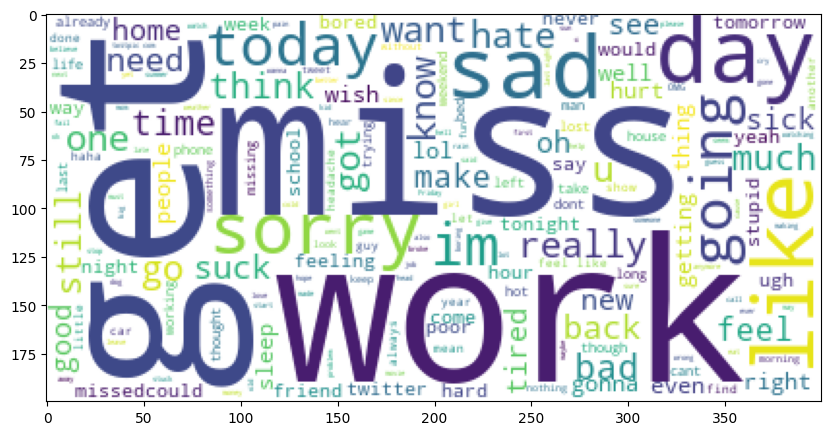

In [25]:
wordcloud = WordCloud(stopwords = stopwords_set, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [26]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [27]:
negative_df.head()

,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [28]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


## 5. List of Stopwords


In [29]:

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [30]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [31]:
df.drop(['textID'], axis = 1, inplace = True)

In [32]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

## 6. Dividing the Data into Training and Cross Validation Data 


In [33]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [34]:
X_train.shape

(19236, 3)

In [35]:
X_cv.shape

(8244, 3)

## 7. Function for Replacing Words


In [36]:

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [37]:
!pip install tqdm

## 8. Preprocessing the Text 


In [38]:
from tqdm import tqdm
preprocessed_text = []

for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 19236/19236 [00:02<00:00, 9104.51it/s]


In [39]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [40]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [41]:

from tqdm import tqdm
preprocessed_text = []

for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 8244/8244 [00:00<00:00, 10306.71it/s]


In [42]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [43]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [44]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [45]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

## 9. Tfidf Vectorizer


In [46]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [47]:
X_train_text.shape

(19236, 20619)

In [48]:
X_train_text[0: 5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31 stored elements and shape (5, 20619)>

## 10. Neural Network Model for Prediction 
 

In [49]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [50]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [51]:
y_train

19832    negative
10340    negative
11044    positive
14088    negative
20333     neutral
           ...   
15650    positive
22638    positive
10124    positive
5601     positive
14001    negative
Name: sentiment, Length: 19236, dtype: object

In [52]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)


In [53]:
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [54]:
y_train_final = to_categorical(y_train_converted)

In [55]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [56]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [57]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [58]:
X_train['text'].head()

19832          24 hours since dog put sleep rip old friend
10340                        not feeling comfortable today
11044             hurray twin girls born beautiful may day
14088                                        bah h8 waking
20333    textmate crashed first time 3 months not bad a...
Name: text, dtype: object

In [59]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [60]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [61]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [62]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [63]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [64]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [65]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [66]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [67]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [68]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [69]:
y_train_final[0: 5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [70]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [71]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [72]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


## 11. Count Vectorizer


In [73]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [74]:
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 135844 stored elements and shape (19236, 20619)>

In [75]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [76]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [77]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

## 12. Neutral Network Model 

We would now be using the deep neural networks that we are going to be learning and ensure that we are getting the best predictions respectively. We would start with 100 neutrons from the first layer and followed by 25 neutrons in the second layer and 10 units in the third layer followed by 3 final layers which we are going to be using the softmax classifier for predictions respectively. 

In [78]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')



In [79]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4911 - loss: 1.0016 - val_accuracy: 0.6835 - val_loss: 0.7695
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7102 - loss: 0.7037 - val_accuracy: 0.6923 - val_loss: 0.7369
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7884 - loss: 0.5459 - val_accuracy: 0.6957 - val_loss: 0.7747
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.8559 - loss: 0.3948 - val_accuracy: 0.6828 - val_loss: 0.8747
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8998 - loss: 0.2986 - val_accuracy: 0.6807 - val_loss: 0.9957
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9218 - loss: 0.2352 - val_accuracy: 0.6807 - val_loss: 1.1422
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9422 - loss: 0.1864 - val_accuracy: 0.6722 - val_loss: 1.2796
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9486 - loss: 0.1617 - 

## 13. Plots of the Results 


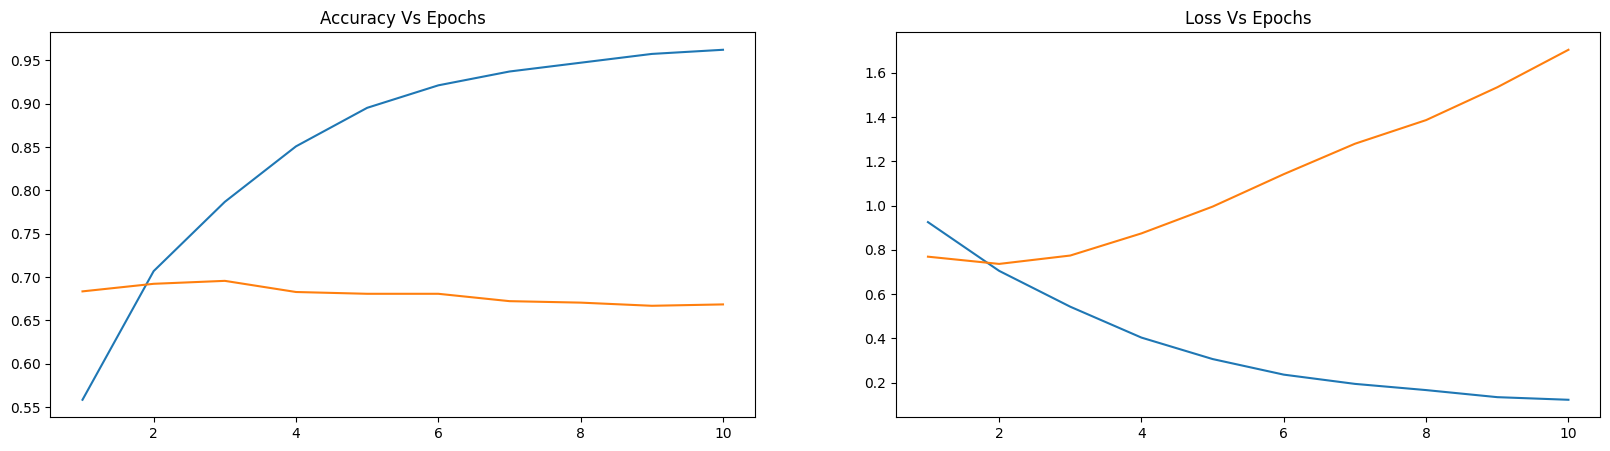

In [80]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()